In [2]:
!pip install pydot

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# load the data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS_BmxRSRvCTBxAn1KzCxAPKtlJ8JcNuipkJepr3zv2TD6ibwx__r5kLSiZii_URxpu5gmh1kOHxCtr/pub?gid=1170682623&single=true&output=csv')


# There are no null columns in the dataset
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [5]:
from sklearn.model_selection import train_test_split

# split the data int x(training data) and y (results)
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [7]:
# Manipulating label data

train_label = []
for v in np.array(y_train):
    e = int(v[0]>v[1]) # is Edable
    train_label.append(e)

train_label = np.array(train_label)



test_label = []
for v in np.array(y_test):
    e = int(v[0]>v[1]) # is Edable
    test_label.append(e)

test_label = np.array(test_label)


In [9]:
# creating model

parameters = {'criterion': ('gini', 'entropy'),
              'min_samples_split': [2, 3, 4, 5],
              'max_depth': [9, 10, 11, 12],
              'class_weight': ('balanced', None),
             }

tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, train_label)
model = gsearch.best_estimator_
model


DecisionTreeClassifier(class_weight='balanced', max_depth=9)

In [10]:
# predicting on test data

score = model.score(X_test, test_label)
print(f"Acuracy of CART model is: {score*100}% on the test data.")

Acuracy of CART model is: 100.0% on the test data.


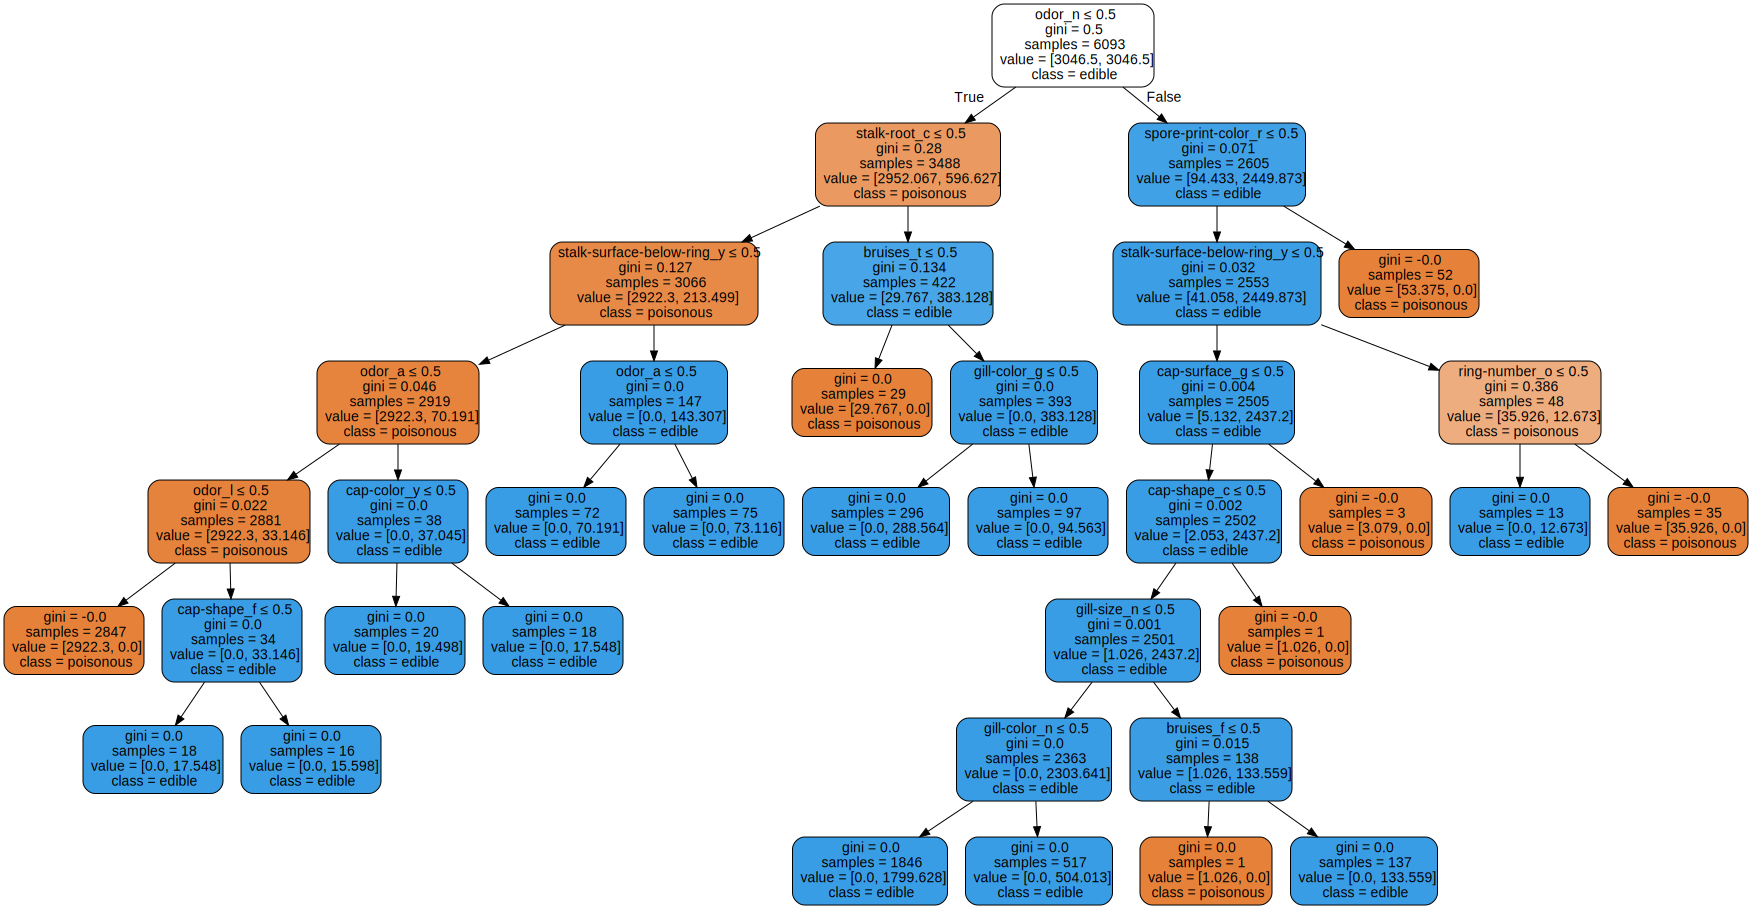

In [13]:
# displaying graph

import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_test.columns,
                               class_names=['poisonous','edible'],
                               filled=True, rounded=True,
                               special_characters=True)


graph = graphviz.Source(dot_data)
graph.render("decision_tree_graph")
graph.format = 'png'
graph



# 0 -> poisolous
# 1 -> Edible